# Wednesday, Week 2: HW 8
# Artificial Intelligence

__Learning objective:__ 
1. Synthesize the topics covered in class, including functions, loops, Booleans, branching, Numpy arrays, and Matplotlib. 
2. Practice parsing complex code to learn new concepts/tools and solve scientific questions -- in this case, play with an image classifying neural network to modify it to your needs. 

__Task:__ You are an intern at Google Brain who has decided to work with the famous publically available Iris dataset, which provides data for 150 individual flowers on their sepal/petal lengths/widths, as well as their iris species. You examined your data last night and have developed some intuition for it: clearly, the different iris species tend to have rather different physical characteristics! You have also built and trained your first neural network together with your colleagues to classify flowers in two different species based on their petal lengths/width. You will now modify your neural network to classify the flowers using different characteristics, and, in the process, gain a better familiarity with the code. 

Read through the following code (that we covered in class). This code takes only the flowers in the iris dataset that are either virginica or versicolor, and trains a neural net to classify their species based on their petal lengths and widths.

__Answer the following questions:__ 
1. Modify your neural net to classify the virginica and versicolor flowers based on their __sepal lengths and widths__. How does this perform compared to the petal length/width classifier? Compare your conclusion to the 4x4 grid of plots from HW 7. Does this make sense? Explain. 

2. Modify your neural net to classify the virginica and __setosa__ flowers based on their __petal lengths and widths__. How does this perform compared to the petal length/width classifier? Compare your conclusion to the 4x4 grid of plots from HW 7. Does this make sense? Explain. 

__Source:__ (DEPRECATED) https://towardsdatascience.com/neural-network-on-iris-data-4e99601a42c8
https://towardsdatascience.com/7-steps-to-design-a-basic-neural-network-part-2-of-2-792cb7273c3

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Import and format the data

In [70]:
#import the data. 

path_to_iris_csv = "HW7_8_iris.csv"

dataset = pd.read_csv(path_to_iris_csv)
dataset.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [71]:
#convert the data to an array, and throw away the first row containing the column titles. 
data = np.array(dataset.values)
data = data[1:][:]
data.shape

(149, 6)

# Build a neural network

In [72]:
#DECLARE FUNCTIONS: 

#this initializes the neural net's first "guessing method" to something random-
#it has no idea what it's looking for when it starts 
def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2) # seed the random number generator so that it produces consistent results every run. 
    
    W1 = np.random.randn(n_h, n_x) * 0.01   #weight matrix of shape (n_h, n_x)
    b1 = np.zeros(shape=(n_h, 1))           #bias vector of shape (n_h, 1)
    W2 = np.random.randn(n_y, n_h) * 0.01   #weight matrix of shape (n_y, n_h)
    b2 = np.zeros(shape=(n_y, 1))           #bias vector of shape (n_y, 1)
       
    #store parameters into a dictionary    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
#     {'W1': array([[-0.00416758, -0.00056267],
#        [-0.02136196,  0.01640271],
#        [-0.01793436, -0.00841747],
#        [ 0.00502881, -0.01245288],
#        [-0.01057952, -0.00909008],
#        [ 0.00551454,  0.02292208]]), 
#      'b1': array([[0.],[0.],[0.],[0.],[0.],[0.]]), 
#      'W2': array([[ 0.00041539, -0.01117925,  0.00539058, -0.0059616 , -0.0001913 ,
#          0.01175001]]), 
#      'b2': array([[0.]])}
    return parameters

#Function to define the size of the layer
def layer_sizes(X, Y):
    n_x = X.shape[0]  # size of input layer  
    n_h = 6 # size of hidden layer
    n_y = Y.shape[0] # size of output layer 
     
    return (n_x, n_h, n_y)

#this function computes the neural net's best guess for what Y should be given X,
#based on what it's learned so far. 
def forward_propagation(X, parameters):
    
    #retrieve intialized parameters from dictionary    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Implement Forward Propagation to calculate A2 (probability)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)  #tanh activation function
    Z2 = np.dot(W2, A1) + b2
    A2 = 1/(1+np.exp(-Z2))  #sigmoid activation function
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

#this function essentially calculates how close the neural net's "guess" A2 was 
#compared to the true answer Y. 
def compute_cost(A2, Y, parameters):
   
    m = Y.shape[1] # number of training examples
    
    # Retrieve W1 and W2 from parameters
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    
    return cost

#this function adjusts the neural net's guessing method based on how well it
#guessed last time. This is like giving the neural net feedback on how it performed. 
def backward_propagation(parameters, cache, X, Y):
# Number of training examples
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Retrieve A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

#this function updates the neural net's guessing method using the results of backward_propagation. 
def update_parameters(parameters, grads, learning_rate=1.2):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters


In [73]:

#this is the actual neural net and the loop is where it learns! 
#given some input X, learn to predict Y from X. 
#n_h is a measure of how complex the neural net is.
#num_iterations is the number of times the neural net will guess and then update its guessing method with feedback
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    #set up some dimensions of the neural net. 
    np.random.seed(3)
    n_x, _, n_y = layer_sizes(X, Y)
    #initialize the neural net's first guess with some random numbers to fill in the matrices/vectors
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    #unpack parameters into variables W1, b1, W2, b2. 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    #loop over the number of times the neural net will guess, get feedback, and update its guessing method. 
    for i in range(0, num_iterations):
         
        #here, the neural net makes some predictions about what Y should be given X
        #based on its current guessing method. 
        #A2 is its guess. 
        #cache simply stores some intermediate results as the neural net is doing its math. 
        A2, cache = forward_propagation(X, parameters)
#         print(A2[0])
#         print(Y[0])
        #then, we compare the neural net's guess A2 to the true answer Y to see how well it's doing. 
        cost = compute_cost(A2, Y, parameters)
         
        #now, the neural net figures out how far off it was and uses that to adjust
        #its guessing method for the next go-around. 
        grads = backward_propagation(parameters, cache, X, Y) 
        parameters = update_parameters(parameters, grads)
        
        
        #this prints out how well the neural net is doing every 1000 steps. 
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    
    #once we're done, return the neural net's final answer for its fitted model on how to predict Y from X. 
    return parameters,n_h


# Set up the data you will hand the neural net and inspect it.

     Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0             1           5.1          3.5           1.4          0.2       2
1             2           4.9          3.0           1.4          0.2       2
2             3           4.7          3.2           1.3          0.2       2
3             4           4.6          3.1           1.5          0.2       2
4             5           5.0          3.6           1.4          0.2       2
..          ...           ...          ...           ...          ...     ...
145         146           6.7          3.0           5.2          2.3       0
146         147           6.3          2.5           5.0          1.9       0
147         148           6.5          3.0           5.2          2.0       0
148         149           6.2          3.4           5.4          2.3       0
149         150           5.9          3.0           5.1          1.8       0

[100 rows x 6 columns]


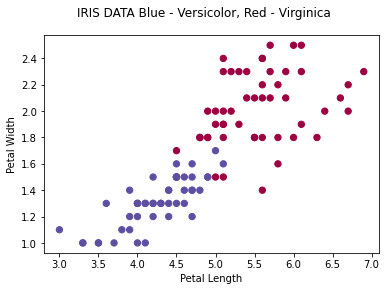

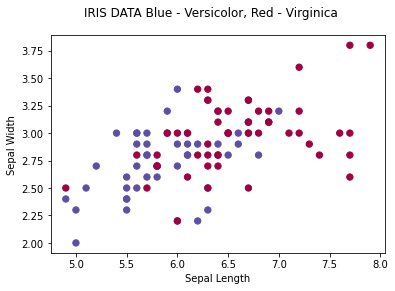

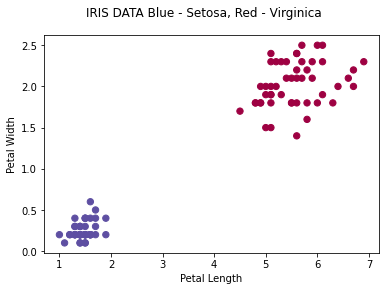

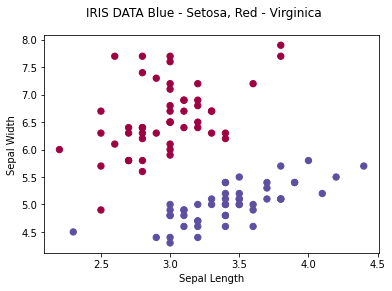

In [110]:
#this cell intentionally left uncommented. 
#TODO: read through this and parse what it is doing! 
#you might need to look up the .loc function from the pandas module. 

path_to_iris_file = "HW7_8_iris.csv"

#this works
# virginica, setosa, petal length vs width. 
iris = pd.read_csv(path_to_iris_file)
# BE CAREFUL!!! 
# Pick the first species you want to compare, and set it to 0. 
# Pick the second species you want to compare, and set it to 1. 
# Set the last remaining species to 2. 

iris.loc[iris['Species']=='virginica','Species']= 0
iris.loc[iris['Species']=='versicolor','Species']= 1
iris.loc[iris['Species']=='setosa','Species'] = 2

iris2 = iris.copy(deep=True)
iris = iris[iris['Species']!=2]
iris2 = iris2[iris2['Species']!=1]
print(iris2)

# This will grab all the values within petal length and petal width, and transpose so that the columns are written into the list as one whole row
# This is for Virginica and Versicolor
X = iris[['Petal.Length', 'Petal.Width']].values.T
Y = iris[['Species']].values.T
Y = Y.astype('uint8')

X2 = iris[['Sepal.Length', 'Sepal.Width']].values.T
Y2 = iris[['Species']].values.T
Y2 = Y2.astype('uint8')

# Same thing, but for Setosa and Virginica
X_ = iris2[['Petal.Length', 'Petal.Width']].values.T
Y_ = iris2[['Species']].values.T
Y_ = Y_.astype('uint8')
# print(X_)
# print(Y_)

X2_ = iris2[['Sepal.Length', 'Sepal.Width']].values.T
Y2_ = iris2[['Species']].values.T
Y2_ = Y2_.astype('uint8')
# print(X2_)
# print(Y2_)
#Make a scatter plot
fig, ax = plt.subplots()
ax.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral);
fig.suptitle("IRIS DATA Blue - Versicolor, Red - Virginica ")
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width');

#Make a scatter plot
fig, ax = plt.subplots()
ax.scatter(X2[0, :], X2[1, :], c=Y2[0,:], s=40, cmap=plt.cm.Spectral);
fig.suptitle("IRIS DATA Blue - Versicolor, Red - Virginica ")
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width');

#Make a scatter plot
fig, ax = plt.subplots()
ax.scatter(X_[0, :], X_[1, :], c=Y_[0,:], s=40, cmap=plt.cm.Spectral);
fig.suptitle("IRIS DATA Blue - Setosa, Red - Virginica ")
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width');

#Make a scatter plot
fig, ax = plt.subplots()
ax.scatter(X2_[1, :], X2_[0, :], c=Y2_[0,:], s=40, cmap=plt.cm.Spectral);
fig.suptitle("IRIS DATA Blue - Setosa, Red - Virginica ")
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width');



# Run your neural net:

In [94]:
#run your neural net! This is for petal length vs petal width
parameters = nn_model(X,Y , n_h = 6, num_iterations=10000, print_cost=True)

#run your neural net! This is for sepal length vs petal width
parameters2 = nn_model(X2,Y2 , n_h = 6, num_iterations=10000, print_cost=True)

#run your neural net! This is for sepal length vs petal width
parameters3 = nn_model(X_,Y_ , n_h = 6, num_iterations=10000, print_cost=True)

#run your neural net! This is for sepal length vs petal width
parameters4 = nn_model(X2_,Y2_ , n_h = 6, num_iterations=10000, print_cost=True)

Cost after iteration 0: 0.693225
Cost after iteration 1000: 0.402530
Cost after iteration 2000: 0.149060
Cost after iteration 3000: 0.132325
Cost after iteration 4000: 0.132567
Cost after iteration 5000: 0.115366
Cost after iteration 6000: 0.099302
Cost after iteration 7000: 0.097014
Cost after iteration 8000: 0.095698
Cost after iteration 9000: 0.094169
Cost after iteration 0: 0.693182
Cost after iteration 1000: 0.723595
Cost after iteration 2000: 0.685614
Cost after iteration 3000: 0.635554
Cost after iteration 4000: 0.647342
Cost after iteration 5000: 0.623313
Cost after iteration 6000: 0.593670
Cost after iteration 7000: 0.670257
Cost after iteration 8000: 0.632173
Cost after iteration 9000: 0.559711
Cost after iteration 0: 89.434489


<ipython-input-72-4da14b9656c4>:73: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))


Cost after iteration 1000: inf
Cost after iteration 2000: inf
Cost after iteration 3000: inf
Cost after iteration 4000: inf
Cost after iteration 5000: inf
Cost after iteration 6000: inf
Cost after iteration 7000: inf
Cost after iteration 8000: inf
Cost after iteration 9000: inf
Cost after iteration 0: 89.497589
Cost after iteration 1000: 1146.741088
Cost after iteration 2000: 1237.954665
Cost after iteration 3000: 1290.649835
Cost after iteration 4000: 1327.846438
Cost after iteration 5000: 1356.609547
Cost after iteration 6000: 1380.056436
Cost after iteration 7000: 1399.840373
Cost after iteration 8000: 1416.943977
Cost after iteration 9000: 1431.998551


# __DISCUSSION:__ What happens to the cost every thousand iterations? What does this mean?

# Visualize your neural network's performance:

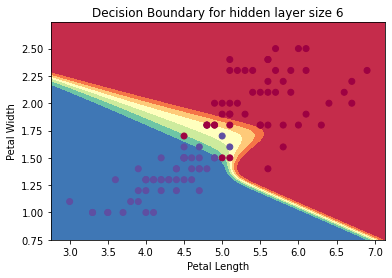

In [95]:
# given your neural network's final answer, predict the values of Y given X. 
def predict(X, parameters):
    
    W1 = parameters[0]['W1']
    b1 = parameters[0]['b1']
    W2 = parameters[0]['W2']
    b2 = parameters[0]['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)  #tanh activation function
    Z2 = np.dot(W2, A1) + b2
    A2 = 1/(1+np.exp(-Z2))  #sigmoid activation function
    
    return A2


def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 0.25, X[0, :].max() + 0.25
    y_min, y_max = X[1, :].min() - 0.25, X[1, :].max() + 0.25
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid -- this will include new points that were not in our dataset!
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    

plot_decision_boundary(lambda x: predict(x.T, parameters), X, Y[0,:])
plt.title("Decision Boundary for hidden layer size " + str(6))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width');

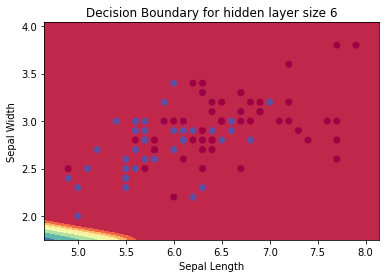

In [96]:
plot_decision_boundary(lambda x: predict(x.T, parameters), X2, Y2[0,:])
plt.title("Decision Boundary for hidden layer size " + str(6))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width');

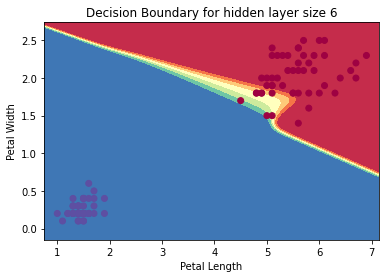

In [97]:
plot_decision_boundary(lambda x: predict(x.T, parameters), X_, Y_[0,:])
plt.title("Decision Boundary for hidden layer size " + str(6))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width');

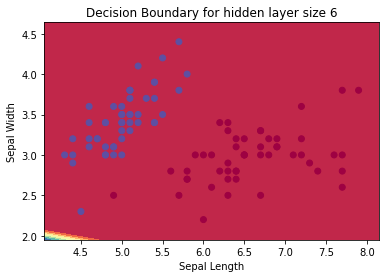

In [100]:
# Setosa is red here. 
plot_decision_boundary(lambda x: predict(x.T, parameters), X2_, Y2_[0,:])
plt.title("Decision Boundary for hidden layer size " + str(6))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width');

# Answer the following discussion questions: 

Please inspect the following grid of scatter plots from HW 7, which visualizes the iris data set. (If you cannot see the picture, you can also download challenge_ref.png from Canvas/Extras/HW 7 figures). 

<img src="HW 7 figures/challenge_ref.png" alt="Drawing" align="left" style="width: 800px;"/>





1. Modify your neural net to classify the virginica and versicolor flowers based on their __sepal lengths and widths__. How does this perform compared to the petal length/width classifier? Compare your conclusion to the 4x4 grid of plots from HW 7, shown above. Does this make sense? Explain. 




2. Modify your neural net to classify the virginica and __setosa__ flowers based on their __sepal lengths and widths__. How does this perform compared to the petal length/width classifier? Compare your conclusion to the 4x4 grid of plots from HW 7. Does this make sense? Explain. 

__Feedback__: How long did this assignment take you? On a scale of 1 (simple) to 5 (difficult), how did it go? 

In [78]:
# TODO: how long did this assignment take you?

In [79]:
# TODO: rate this HW's difficulty on a scale of 1-5. 

__Feedback__: How comfortable do you feel with the topics covered in this assignment? Are there any topics you would like to review together as a class? 

In [80]:
# TODO: Convert to a markdown cell and 
# answer feedback questions above.